In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
import matplotlib.pyplot as plt
from flashtorch.utils import apply_transforms, load_image
from flashtorch.saliency import Backprop

from model_conv import SimpleCNN

In [3]:
import torchvision.models as models
from flashtorch.activmax import GradientAscent

model = SimpleCNN()

model.load_state_dict(torch.load('best_simple_life_UNet_0.2.0.pth', 
                                 map_location=torch.device('cpu'), weights_only=True))

FileNotFoundError: [Errno 2] No such file or directory: 'best_simple_life_UNet_0.2.0.pth'

In [ ]:
print(model)

SimpleCNN(
  (conv1): Conv2d(2, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), padding_mode=circular)
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): ReLU()
  (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), padding_mode=circular)
  (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act2): ReLU()
  (conv3): Conv2d(32, 2, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), padding_mode=circular)
)


In [11]:
from pprint import pprint


pprint(model.state_dict().keys())

odict_keys(['conv1.weight', 'conv1.bias', 'bn1.weight', 'bn1.bias', 'bn1.running_mean', 'bn1.running_var', 'bn1.num_batches_tracked', 'conv2.weight', 'conv2.bias', 'bn2.weight', 'bn2.bias', 'bn2.running_mean', 'bn2.running_var', 'bn2.num_batches_tracked', 'conv3.weight', 'conv3.bias'])


In [ ]:
model.state_dict()["conv1.weight"].shape

torch.Size([32, 2, 3, 3])

In [47]:
weight_tensor = model.state_dict()["conv1.weight"]

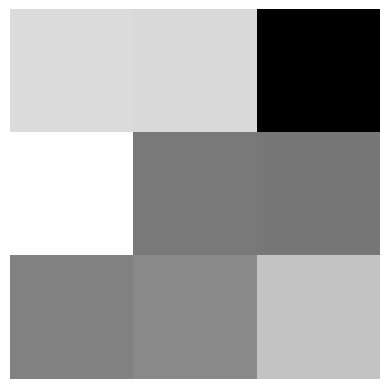

In [48]:
from einops import rearrange

for w in weight_tensor:
    a, b = w[0], w[1]
    plt.imshow(a.detach().numpy(), cmap='gray')
    plt.axis('off')
    plt.show()
    break

32 6 tensor(-2.5156) tensor(2.8974)


/var/folders/bs/pbmws09d35qgn5630zhrlhb00000gn/T/ipykernel_8737/3087510875.py:27: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


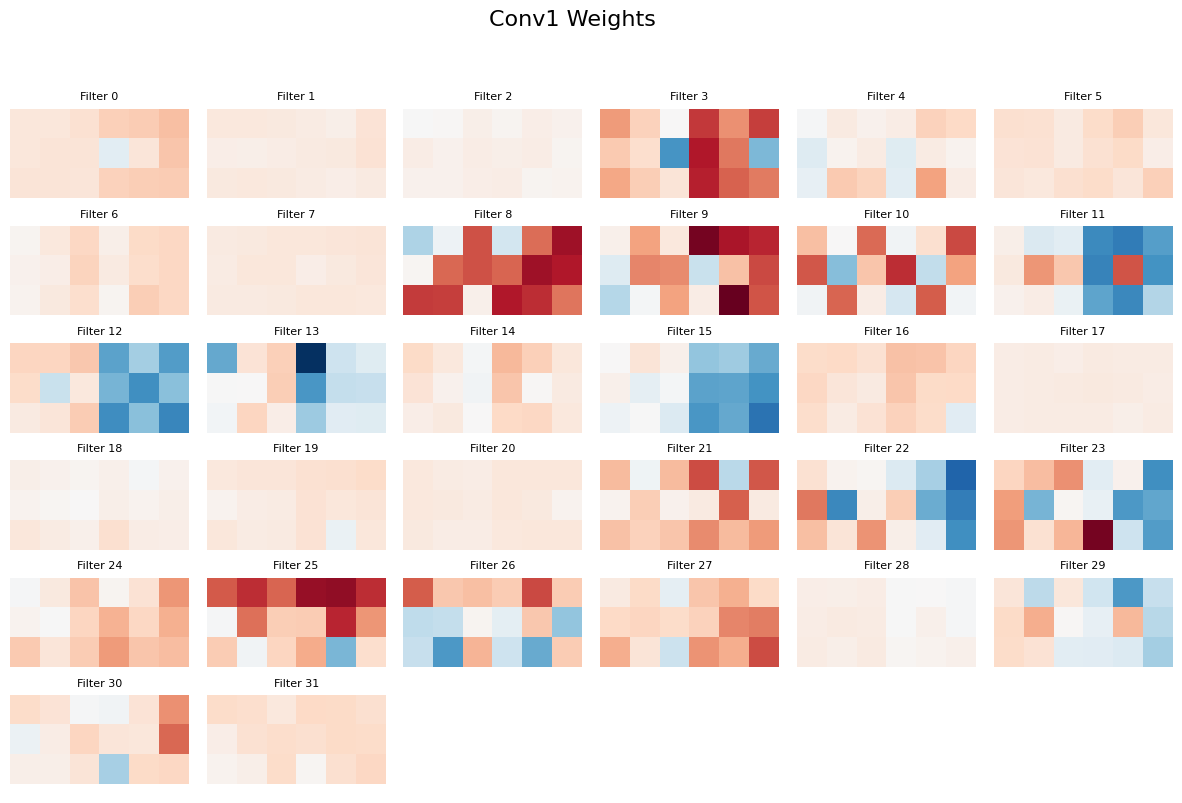

In [50]:
from einops import rearrange

num = weight_tensor.shape[0]
vmin, vmax = weight_tensor.min(), weight_tensor.max()
grid_len = int(num**0.5)+1

print(num, grid_len, vmin, vmax)

fig, axs = plt.subplots(grid_len, grid_len, figsize=(15, 9))
plt.subplots_adjust(wspace=0.1, hspace=0.1)

fig.suptitle('Conv1 Weights', fontsize=16)

for idx, w in enumerate(weight_tensor):
    w_ = rearrange(w, 'c h w -> h (c w)')
    ax = axs[idx//grid_len, idx%grid_len]
    ax.imshow(w_.detach().numpy(), 
            cmap='RdBu',
            vmin=vmin,
            vmax=vmax)
    ax.axis('off')
    ax.set_title(f'Filter {idx}', fontsize=8)
    
for i in range(idx+1, grid_len*grid_len):
    axs[i//grid_len, i%grid_len].axis('off')

fig.show()


In [37]:
for name, param in model.state_dict().items():
    if 'weight' in name:
        print(name, param.shape)
    if 'bias' in name:
        print(name, param.shape)

conv1.weight torch.Size([32, 2, 3, 3])
conv1.bias torch.Size([32])
bn1.weight torch.Size([32])
bn1.bias torch.Size([32])
conv2.weight torch.Size([32, 32, 3, 3])
conv2.bias torch.Size([32])
bn2.weight torch.Size([32])
bn2.bias torch.Size([32])
conv3.weight torch.Size([2, 32, 3, 3])
conv3.bias torch.Size([2])


In [51]:
model.state_dict()["conv3.weight"].shape

torch.Size([2, 32, 3, 3])

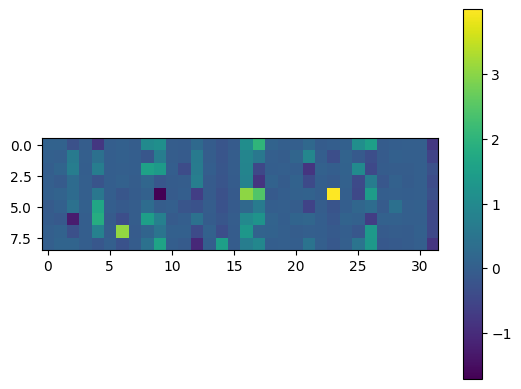

In [54]:
plt.imshow(model.state_dict()["conv3.weight"][0].reshape(-1, 9).T)
plt.colorbar()

In [ ]:
plt.imshow(model.state_dict()["conv3.weight"][0].reshape(-1, 9).T)
plt.colorbar()

In [ ]:
import torch

import matplotlib.pyplot as plt

In [ ]:
import torchvision.transforms.v2 as v2

transform = v2.Compose([
    v2.RandomErasing(0.8, (1e-4, 5e-4), value=0),
    v2.RandomErasing(0.8, (1e-4, 5e-4), value=1),
    v2.RandomErasing(0.8, (1e-4, 5e-4), value=0),
    v2.RandomErasing(0.8, (1e-4, 5e-4), value=1),
])

(-0.5, 99.5, 99.5, -0.5)

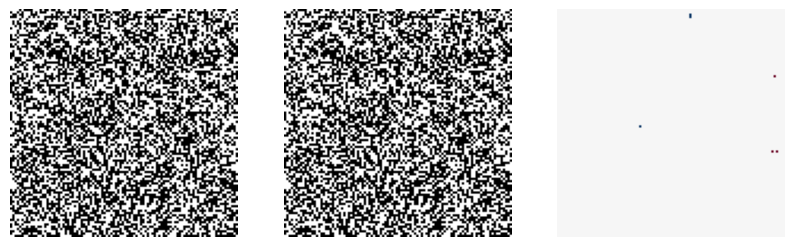

In [345]:
a = torch.randint(0, 2, (1, 100, 100)).float()

plt.figure(figsize=(10, 4))

plt.subplot(1, 3, 1)
plt.imshow(a.reshape(100, 100, 1), cmap="Grays")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow((b:=transform(a)).reshape(100, 100, 1), cmap="Grays")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow((b-a).reshape(100, 100, 1), cmap="RdBu", vmin=-1, vmax=1)
plt.axis("off")

In [37]:
import random
from torch import tensor, Tensor

for i in range(9):
    ls = ([0 for _ in range(i)] + [1 for _ in range(8-i)])
    random.shuffle(ls)
    ls = ls[:4] + [-1] + ls[4:]
    t = tensor(ls, dtype=float).reshape(1, 3, 3)
    
    print(t)

tensor([[[ 1.,  1.,  1.],
         [ 1., -1.,  1.],
         [ 1.,  1.,  1.]]], dtype=torch.float64)
tensor([[[ 1.,  1.,  1.],
         [ 1., -1.,  1.],
         [ 1.,  0.,  1.]]], dtype=torch.float64)
tensor([[[ 0.,  1.,  1.],
         [ 1., -1.,  1.],
         [ 1.,  0.,  1.]]], dtype=torch.float64)
tensor([[[ 1.,  1.,  0.],
         [ 1., -1.,  1.],
         [ 0.,  1.,  0.]]], dtype=torch.float64)
tensor([[[ 0.,  0.,  1.],
         [ 1., -1.,  1.],
         [ 0.,  1.,  0.]]], dtype=torch.float64)
tensor([[[ 0.,  0.,  1.],
         [ 0., -1.,  0.],
         [ 0.,  1.,  1.]]], dtype=torch.float64)
tensor([[[ 0.,  0.,  0.],
         [ 0., -1.,  1.],
         [ 1.,  0.,  0.]]], dtype=torch.float64)
tensor([[[ 1.,  0.,  0.],
         [ 0., -1.,  0.],
         [ 0.,  0.,  0.]]], dtype=torch.float64)
tensor([[[ 0.,  0.,  0.],
         [ 0., -1.,  0.],
         [ 0.,  0.,  0.]]], dtype=torch.float64)
